In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
def load_data_DB1(subject=1,exercise=1):
    data = loadmat(f'../Dataset/DB1/s{subject}/S{subject}_A1_E{exercise}.mat')
    return data

In [3]:
def get_stimulus_start_indexes(data=load_data_DB1(1,2),movement=1):
    start_indexes=[]
    for idx,move in enumerate(data['stimulus']):
        if move[0] == movement and data['stimulus'][idx-1][0] == 0:
            start_indexes.append(idx)
        if len(start_indexes) == 10:
            break
    return start_indexes

In [4]:
def get_restimulus_start_indexes(data=load_data_DB1(1,1),movement=1):
    start_indexes=[]
    for idx,move in enumerate(data['restimulus']):
        if move[0] == movement and data['restimulus'][idx-1][0] == 0:
            start_indexes.append(idx)
        if len(start_indexes) == 10:
            break
    return start_indexes

In [5]:
data = load_data_DB1(subject=4,exercise=1)

In [7]:
# Get stimulus start indexes
stimulus_start = get_stimulus_start_indexes(data=data,movement=1)
stimulus_start

[321, 1153, 1985, 2818, 3650, 4482, 5318, 6151, 6983, 7815]

In [9]:
# Get restimulus start indexes
restimulus_start = get_restimulus_start_indexes(data=data,movement=1)
restimulus_start

[431, 1234, 2102, 2931, 3781, 4623, 5393, 6241, 7034, 7836]

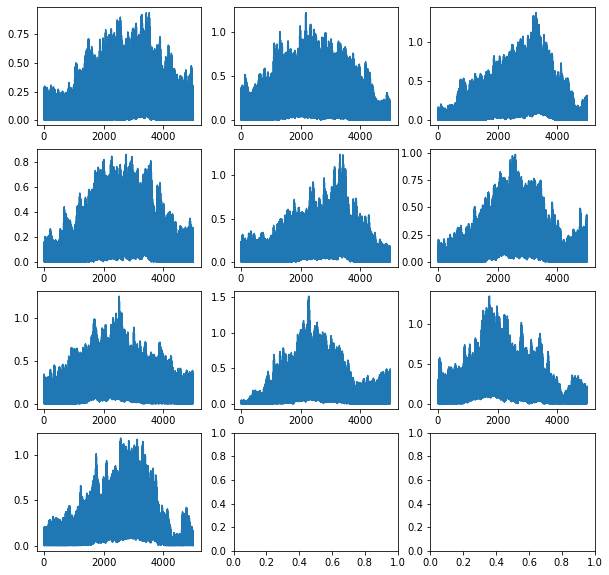

In [10]:
# Create dataframe with the ten repetitions of the movement based on stimulus column

df = pd.DataFrame(columns=range(0,5000))
for i,start_idx in enumerate(stimulus_start):
    df.loc[i] = data['emg'][start_idx:start_idx+500].flatten()


# Plot the 10 repetitions of the movement
fig , ax = plt.subplots(nrows=4,ncols=3,figsize=(10,10))

r = 0
c=0
for i in range(0,10):
    if i % 3 == 0 and i > 0:
        r+=1
        c=0
    ax[r,c].plot(range(1,5001),df.loc[i])
    c+=1


In [11]:
# Capture the real whole movement based on restimulus column irrespective of how long it takes
correct_movements = []
movement = 1
for s in restimulus_start:
    rep = np.zeros((10,))
    i = s
    while data['restimulus'][i] == movement:
        rep = np.append(rep,data['emg'][i])
        i+=1
    correct_movements.append(rep.flatten())



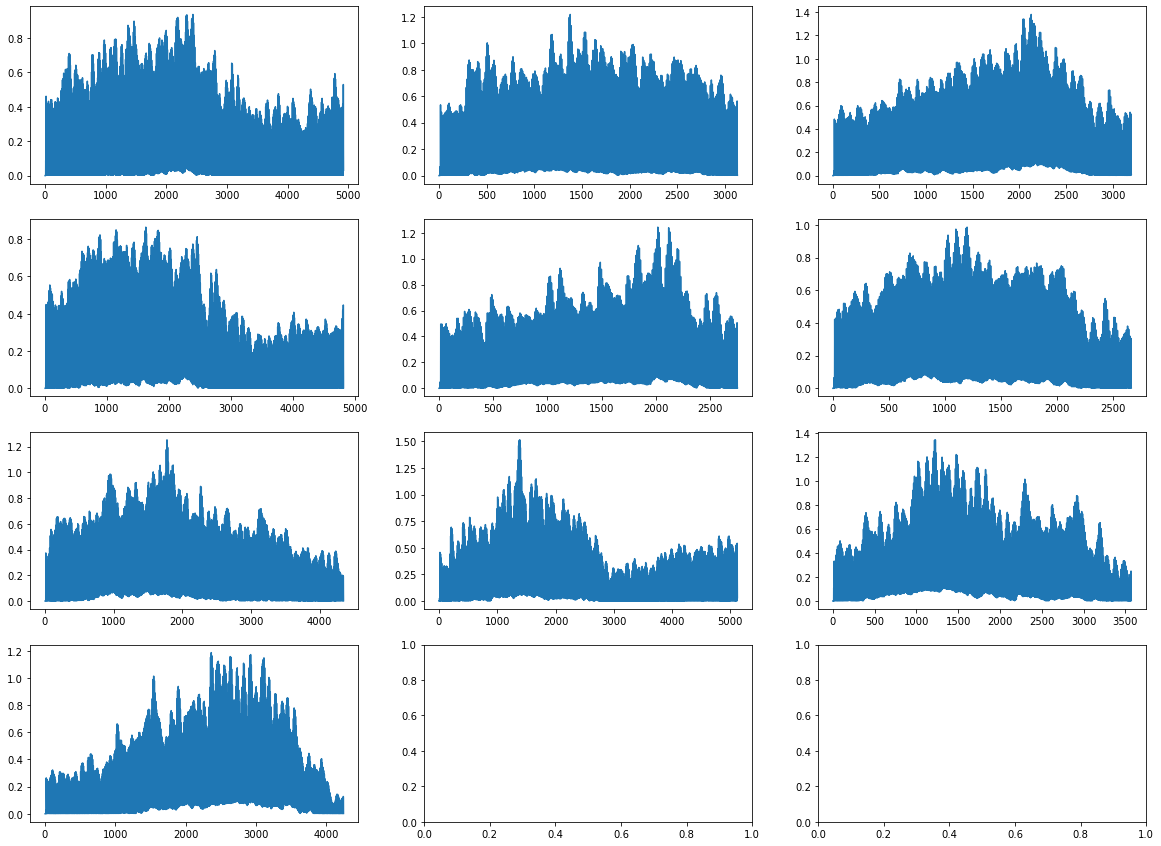

In [12]:
fig , ax = plt.subplots(nrows=4,ncols=3,figsize=(20,15))
r = 0
c=0
for i,movement in enumerate(correct_movements):
    x = range(1,len(movement)+1)
    # Plot the 10 repetitions of the movement
    if i % 3 == 0 and i > 0:
        r+=1
        c=0
    ax[r,c].plot(x, movement)
    c+=1

In [45]:
x = 3
data['emg'][x],data['stimulus'][x]

(array([0.0684, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.1978, 0.0977,
        0.0024, 0.0024]),
 array([0], dtype=uint8))

In [30]:
# Electrode 1 in repetition 1 in movement 1
x1 = []
for i in range(324,324+500):
    x1.append(data['emg'][i][0])


In [31]:
# Electrode 1 in repetition 2 in movement 1
x2 = []
for i in range(1160,1160+500):
    x2.append(data['emg'][i][0])


In [32]:
# Electrode 1 in repetition 7 in movement 1
x5 = []
for i in range(3668,3668+500):
    x5.append(data['emg'][i][0])



In [33]:
# Electrode 1 in repetition 7 in movement 1
x7 = []
for i in range(5345,5345+500):
    x7.append(data['emg'][i][0])


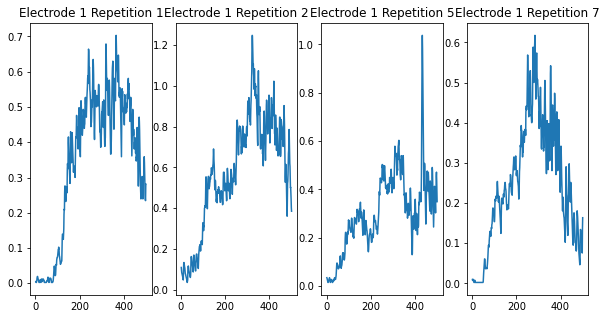

In [34]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4,figsize=(10,5))

ax1.plot(range(1,501),x1)
ax1.set(title='Electrode 1 Repetition 1');

ax2.plot(range(1,501),x2)
ax2.set(title='Electrode 1 Repetition 2');

ax3.plot(range(1,501),x5)
ax3.set(title='Electrode 1 Repetition 5');

ax4.plot(range(1,501),x7)
ax4.set(title='Electrode 1 Repetition 7');


In [96]:
sub1_ex1 = load_data_DB1(subject=1,exercise=1)

In [97]:
start_restimulus = get_restimulus_start_indexes(data=sub1_ex1,movement=2)
start_restimulus,sub1_ex1['restimulus'][8845]

([8845, 9606, 10426, 11261, 12103, 12978, 13843, 14661, 15488, 16298],
 array([2], dtype=uint8))

In [98]:
sub1_ex1['restimulus'][8845+193]

array([0], dtype=uint8)

(1920,) (1920,)


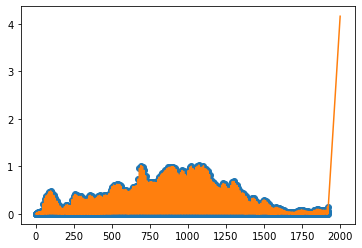

In [100]:
# Interpolation Trials for 200 rows to be 500 .. repetition 1 of movement 1 of exercise 1

import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 1920)
y = sub1_ex1['emg'][8845:8845+192].flatten()
print(x.shape,y.shape)
f = interpolate.interp1d(x, y,fill_value="extrapolate")

xnew = np.arange(0, 2000)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()
